# Colour Hackathon

Count frequency of colour words in text and plot

### Import libraries

In [1]:
import string
import collections as col
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Part 1: Load Data

### Load Text

In [2]:
filename = 'ColourRemarksLines.txt'
myfile = open(filename, 'r',encoding = 'utf-8') # opens file, 'r' specifies you plan on reading it 
remarks_txt = myfile.read() # reads contents as 1 string and stores as variable
myfile.close() # good coding practice to close the file.
print(remarks_txt[53:59]) # pythonic indexing
len(remarks_txt)

colour


60972

### Load word list of colours

In [3]:
filename_colours = 'colour_names.txt'
myColours = open(filename_colours, 'r',encoding = 'utf-8') 
colours_txt = myColours.read() 
myColours.close() 
print(colours_txt)
print(type(colours_txt)) # prints type of variable


Black Blue Brown Green Grey Orange Pink Purple Red White Yellow
<class 'str'>


### Load RGB colours of colour names from ColourNamer

In [4]:
centroids = pd.read_csv('centroids.csv')
len(centroids)
print(centroids)

   color_name    R    G    B
0       beige  195  168  126
1       black   35   28   31
2        blue   84  110  183
3       brown  113   69   41
4    burgundy   98   22   47
5       green   90  151   90
6        grey  135  134  140
7       lilac  174  131  202
8     magenta  179   55  151
9      maroon   99   34   49
10      olive  112  115   55
11     orange  220  124   61
12      peach  227  156  129
13       pink  225  118  178
14     purple  121   58  144
15        red  189   62   57
16     salmon  231  123  110
17        tan  191  145   87
18       teal   57  126  124
19  turquoise   63  185  177
20      white  211  205  210
21     yellow  227  203   78


## Part 2: Pre-processing

### Pre-process Text
Remove panctuation, convert to case to lower, remove any white spaces and split string into a list of words

In [5]:
translator = str.maketrans('', '', string.punctuation)
remarks_cln = remarks_txt.lower().translate(translator).strip().split() 
remarks_cln

['that',
 'we',
 'would',
 'call',
 'a',
 'blackish',
 'brown',
 'n',
 'in',
 'the',
 'colour',
 'of',
 'the',
 'medium',
 'something',
 'black',
 'appears',
 'black',
 'according',
 'to',
 'this',
 'rule',
 'black',
 'on',
 'a',
 'white',
 'background',
 'would',
 'have',
 'ton',
 'allowing',
 'only',
 'white',
 'grey',
 'and',
 'black',
 'to',
 'come',
 'through',
 'here',
 'we',
 'aren',
 'not',
 'doing',
 'physics',
 'we',
 'are',
 'regarding',
 'white',
 'and',
 'black',
 'as',
 'colours',
 'justn',
 '42',
 'we',
 'speak',
 'of',
 'a',
 '‘dark',
 'red',
 'light’',
 'but',
 'not',
 'of',
 'a',
 '‘blackred',
 'light’n',
 '44',
 'we',
 'speak',
 'of',
 'a',
 '‘black’',
 'mirror',
 'but',
 'where',
 'it',
 'mirrors',
 'it',
 'darkensn',
 'of',
 'course',
 'but',
 'it',
 'doesn’t',
 'look',
 'black',
 'and',
 'that',
 'which',
 'is',
 'seen',
 'in',
 'it',
 'doesn',
 '47',
 'we',
 'wouldn’t',
 'want',
 'to',
 'call',
 'a',
 'medium',
 'white',
 'if',
 'a',
 'black',
 'and',
 'whiten',


### Pre-process Colour Words
Convert to case to lower, remove any white spaces and split string into a list of words

In [6]:
words = colours_txt.lower().strip().split(' ')
print(words)

['black', 'blue', 'brown', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']


## Part 3: Counter

### Count frequency

In [7]:
countFreq = col.Counter(remarks_cln)
print(countFreq)

Counter({'a': 452, 'the': 329, 'and': 308, 'white': 267, 'is': 239, 'to': 235, 'of': 226, 'it': 194, 'that': 166, 'we': 148, 'green': 144, 'in': 138, 'red': 126, 'or': 124, 'yellow': 112, 'black': 108, 'as': 91, 'not': 90, 'but': 90, 'be': 90, 'i': 81, 'say': 78, 'blue': 78, 'colour': 72, 'grey': 69, 'would': 63, 'if': 60, 'this': 59, 'can': 57, 'then': 55, 'brown': 53, 'glass': 53, 'for': 53, 'coloured': 50, 'call': 48, 'with': 48, 'an': 48, 'one': 47, 'what': 45, 'there': 42, 'through': 41, 'transparent': 41, 'see': 40, 'yellowish': 38, 'light': 37, 'from': 37, 'something': 36, 'have': 36, 'between': 36, 'n': 35, 'why': 35, 'reddish': 35, 'than': 33, 'which': 32, 'whiten': 32, 'lighter': 32, 'does': 31, 'more': 30, 'only': 28, 'do': 28, 'other': 27, 'on': 26, 'look': 26, 'cannot': 26, 'pure': 26, 'same': 26, 'no': 26, 'may': 26, 'are': 25, 'colours': 25, 'blackn': 25, 'medium': 24, 'when': 24, 'you': 23, 'things': 23, 'blackish': 22, 'by': 22, 'should': 21, 'appears': 20, 'doesn’t': 

### Sort colour word list with their counts

In [8]:
freq = []
for i, word in enumerate (words):
    freq.append(countFreq[words[i]]/len(remarks_cln))
freq, words = zip(*sorted(zip(freq, words),reverse = True))
print(freq,words)

(0.026386006522383636, 0.014230655203083309, 0.012451823302697895, 0.011068287380175906, 0.010672991402312482, 0.007708271568336793, 0.006818855618144086, 0.005237671706690384, 0.0010870639391244194, 0.0004941199723292815, 0.0) ('white', 'green', 'red', 'yellow', 'black', 'blue', 'grey', 'brown', 'orange', 'pink', 'purple')


### Remove words and their frequency with 0 count

Slice the tuple from the start to the last element but exclude the last element

In [9]:
freq = freq[:-1]
print(freq)
words = words[:-1]
print(words)

(0.026386006522383636, 0.014230655203083309, 0.012451823302697895, 0.011068287380175906, 0.010672991402312482, 0.007708271568336793, 0.006818855618144086, 0.005237671706690384, 0.0010870639391244194, 0.0004941199723292815)
('white', 'green', 'red', 'yellow', 'black', 'blue', 'grey', 'brown', 'orange', 'pink')


## Part 4: Data Visualisation

### Bar plot with default Python colours

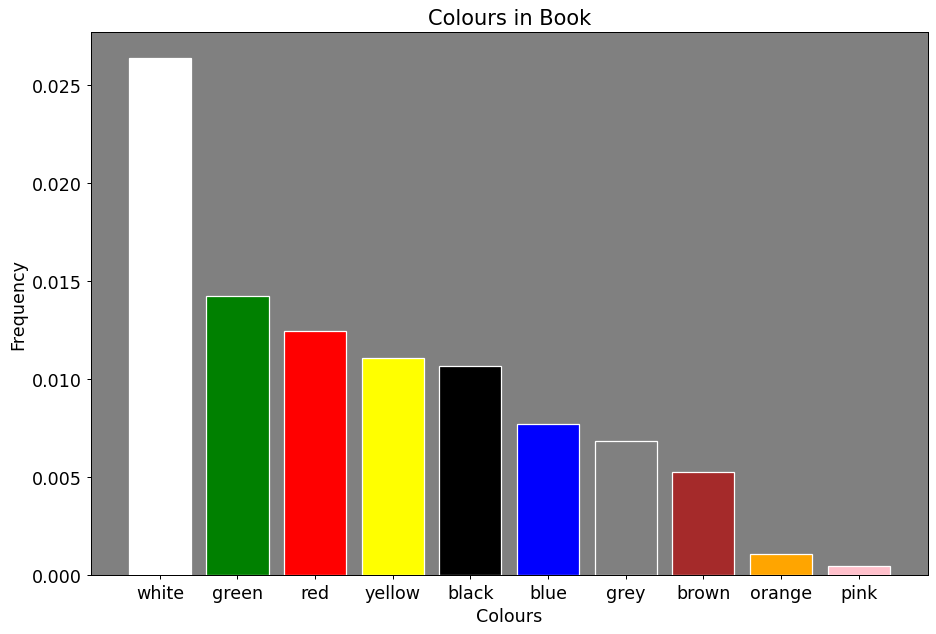

In [10]:
plt.figure(figsize=(12,8), dpi= 90)
plt.rc('font', size=14) 
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")
x_pos = list(range(len(words)))
plt.bar(x_pos, freq, color=words, edgecolor='white')
plt.xlabel('Colours')
plt.ylabel('Frequency')
plt.title('Colours in Book')
plt.xticks(x_pos, words)
plt.show()

### Bar plot with colours from ColourNamer

Arrange RGB values in the right sorted order

In [11]:
rgb = np.zeros((len(words),3))
for idx,word in enumerate (words):
    rgb[idx,:]=centroids.loc[centroids['color_name'] == word, ['R','G','B']]
# Convert to 0-1 scale
rgb = rgb / 255

Bar Plot with Centroids

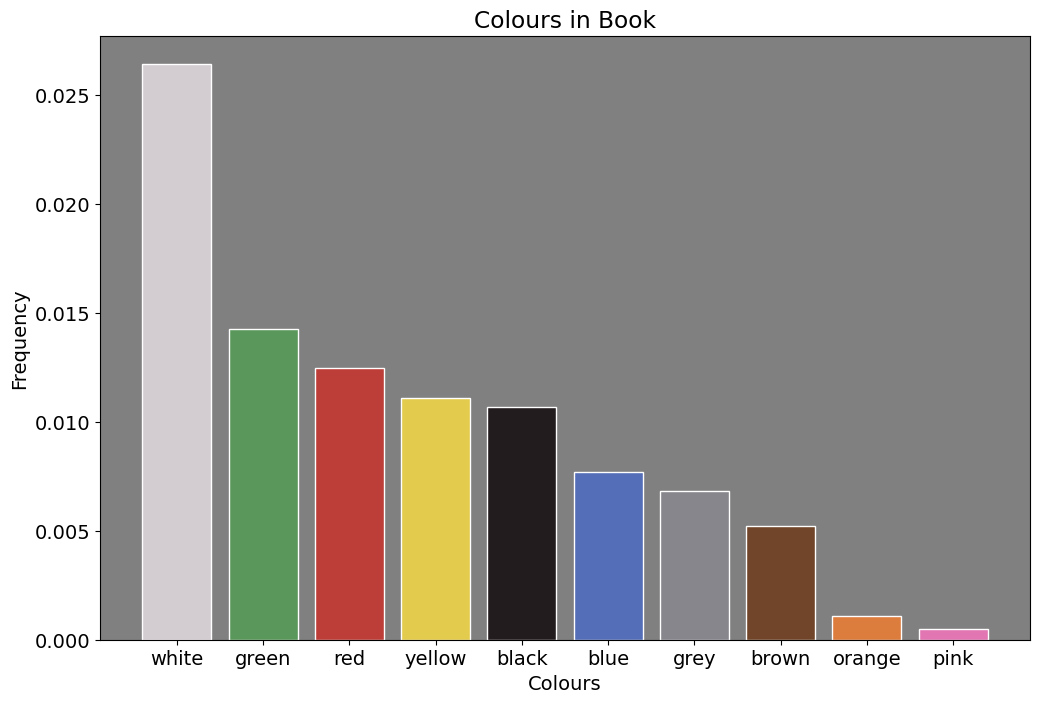

In [12]:
plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")
x_pos = list(range(len(words)))
plt.bar(x_pos, freq, color=rgb, edgecolor='white')
plt.xlabel('Colours')
plt.ylabel('Frequency')
plt.title('Colours in Book')
plt.xticks(x_pos, words)
plt.show()

### Pie chart with centroids

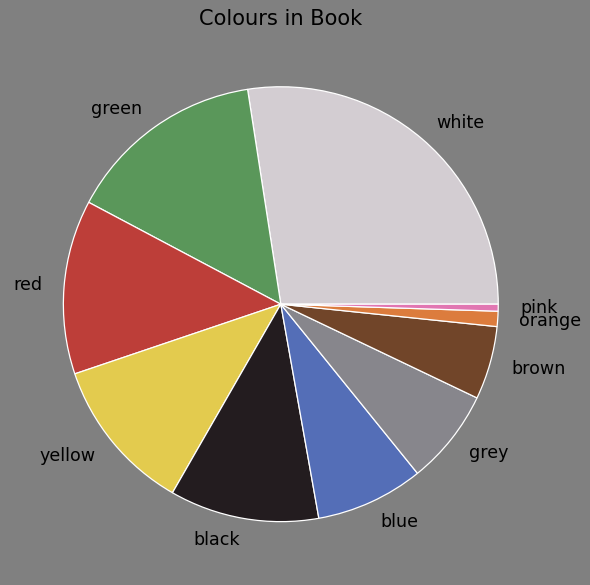

In [13]:
plt.figure(figsize=(12,8), dpi= 90, facecolor='grey')
plt.pie(freq, labels = words, colors=rgb, normalize=True,wedgeprops={'edgecolor':'white'})
plt.title('Colours in Book')
plt.show()

## Conclusions

In [14]:
print(f"The most common colour word in Wittgenstein's Remarks on Colour is {words[0]}. The names of the 6 opponent perceptual categories {words[0:6]} ranked in the top positions and Wittgenstein could have known about opponent theory but he mentioned it {countFreq['opponent']} times.")

The most common colour word in Wittgenstein's Remarks on Colour is white. The names of the 6 opponent perceptual categories ('white', 'green', 'red', 'yellow', 'black', 'blue') ranked in the top positions and Wittgenstein could have known about opponent theory but he mentioned it 0 times.
